# Análise de Dados 🤖
Esse notebook apresenta nossas tentivas e observações iniciais sobre o modelo de dados. 

--- 

**Conteúdo deste notebook:**
1. Imports
1. Conectando com a base
1. Separação entre resposta e atributos
1. Separação entre treino e teste
1. Aplicando nos modelos


## Imports

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

C:\Users\oliviadomingues-ieg\AppData\Local\Temp\ipykernel_15264\417419509.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Conectando com a base

In [3]:
df = pd.read_excel('../base/incluses_tratado.xlsx')

display(df.head(5))

,Participante da Comunidade LGBTQIA+,Faixa Etária,Identidade de Gênero,Orientação Sexual,Cidade/Estado,Escolaridade,Usa Apps para Oportunidades de Emprego?,Preferência de Cursos,Desafios de Emprego por Gênero,Interesse em Empreender,Situação no Mercado de Trabalho,Usa Redes Sociais?,Finalidade do Uso do App Incluses
0,Sim,Menos de 18 anos,Mulher cisgênero,Homossexual,Região Sudeste,Ensino Fundamental completo ou cursando,Sim,Prefiro cursos on-line,Sim,Não,Empregado (a),Sim,Todos acima
1,Sim,Menos de 18 anos,Mulher cisgênero,Homossexual,Região Sudeste,Ensino Fundamental completo ou cursando,Tenho interesse,"Não tenho preferência, pode ser on-line ou pre...",Sim,Não,Empregado (a),Sim,Não usaria o app
2,Sim,Menos de 18 anos,Mulher cisgênero,Pansexual,Região Norte,Ensino Fundamental completo ou cursando,Não,"Não tenho preferência, pode ser on-line ou pre...",Não,Talvez,Empregado (a),Sim,Fazer cursos de qualificação
3,Sim,Menos de 18 anos,Mulher cisgênero,Bissexual,Região Sudeste,Ensino Fundamental completo ou cursando,Não,"Não tenho preferência, pode ser on-line ou pre...",Sim,Não,Empregado (a),Sim,Não usaria o app
4,Sim,Menos de 18 anos,transgênero,Prefiro não informar,Região Sudeste,Nenhum,Não,"Não tenho preferência, pode ser on-line ou pre...",Sim,Sim,Desempregado (a),Sim,Fazer cursos de qualificação


## Pré-processamento

### Separando atributos da resposta

In [4]:
df_resposta = df['Finalidade do Uso do App Incluses']
df_atributo = df.iloc[:, :-1]

print(f'Tamanho da base: {len(df_atributo)}')
print(df_resposta.value_counts())

Tamanho da base: 47
Finalidade do Uso do App Incluses
Todos acima                           16
Fazer cursos de qualificação          14
Encontrar oportunidades de emprego     8
Não usaria o app                       6
Divulgar conteúdos profissionais       3
Name: count, dtype: int64


### Transformando colunas quantitativas em qualitativas

In [5]:
#Resposta
label_encoder = LabelEncoder()

#Treino
preprocessador = ColumnTransformer(
    transformers=[
        ('ordinal_encoder', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool'])),
    ],
    remainder='passthrough',
    verbose_feature_names_out= False 
)

# Aplicando o preprocessador nos atributos
df_atributo = pd.DataFrame(preprocessador.fit_transform(df_atributo), columns=preprocessador.get_feature_names_out())

## Separando treino e teste

In [6]:
# Divida os dados em conjuntos de treino e teste
df_atributos_treino, df_atributos_teste, df_resposta_treino, df_resposta_teste = train_test_split(df_atributo, df_resposta, test_size=0.25, random_state=42)

# Converta para arrays
atributos_treino = df_atributos_treino.values
resposta_treino = df_resposta_treino.values
atributos_teste = df_atributos_teste.values
resposta_teste = df_resposta_teste.values

## Modelos

### DecisionTreeClassifier

#### Gini

##### Testando com dados de teste

Acurácia no conjunto de teste: 0.2500
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        0.00      0.00      0.00         1
Encontrar oportunidades de emprego       0.00      0.00      0.00         1
      Fazer cursos de qualificação       1.00      0.40      0.57         5
                  Não usaria o app       0.00      0.00      0.00         2
                       Todos acima       0.20      0.33      0.25         3

                          accuracy                           0.25        12
                         macro avg       0.24      0.15      0.16        12
                      weighted avg       0.47      0.25      0.30        12

Matriz de Confusão:
[[0 1 0 0 0]
 [0 0 0 0 1]
 [0 1 2 0 2]
 [0 1 0 0 1]
 [1 1 0 0 1]]


C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

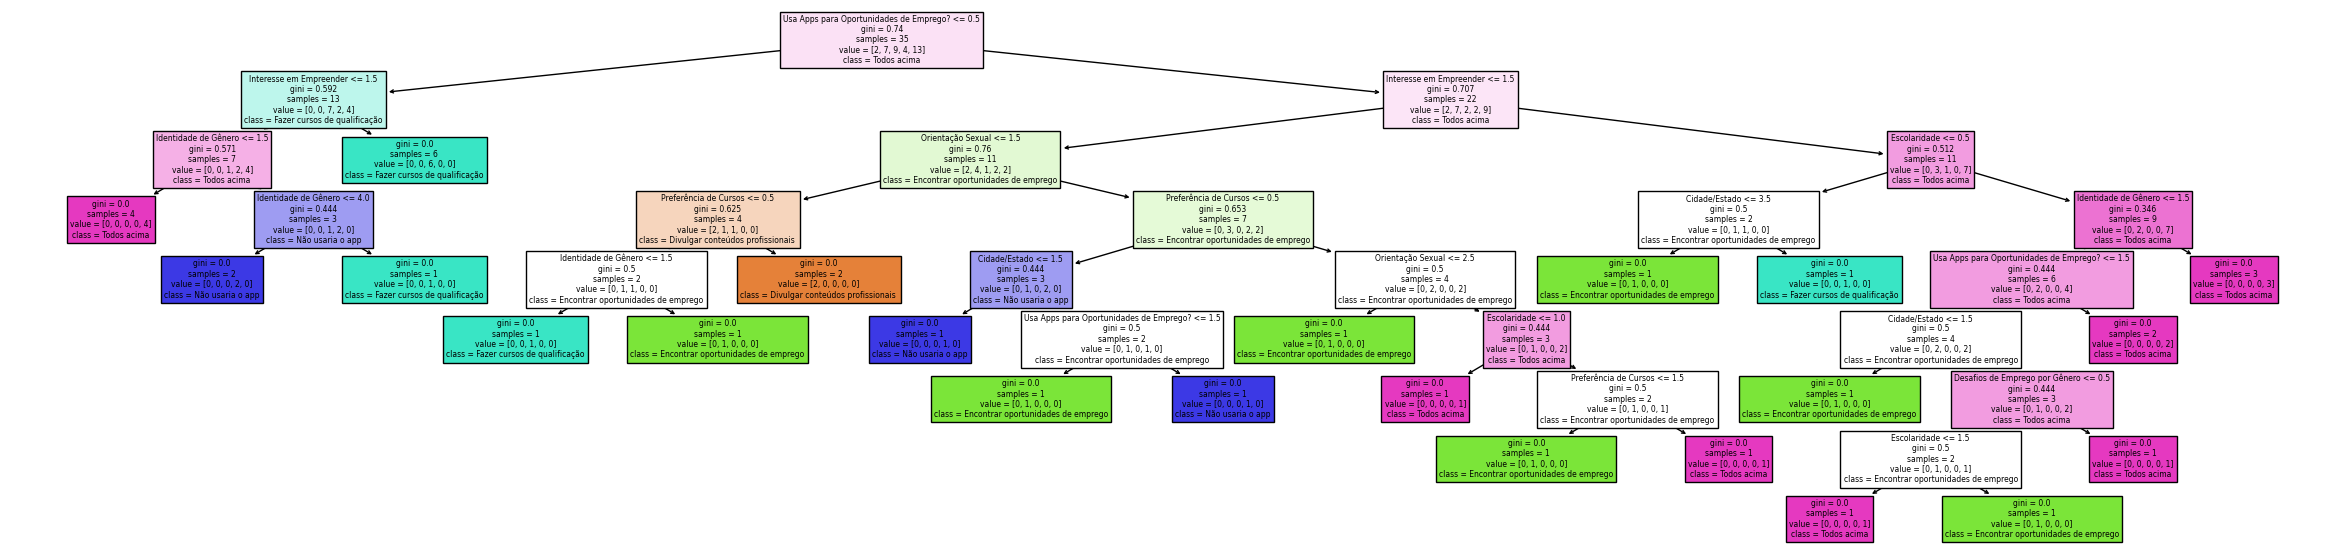

In [7]:

classificador_tree = tree.DecisionTreeClassifier(
        criterion='gini', 
    )

classificador_tree.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de teste
previsoes = classificador_tree.predict(atributos_teste)

# Avalie o desempenho do modelo
acuracia = accuracy_score(resposta_teste, previsoes)
print(f'Acurácia no conjunto de teste: {acuracia:.4f}')

report_classificacao = classification_report(resposta_teste, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_teste, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

plt.figure(figsize=(30,7))
tree.plot_tree(classificador_tree, feature_names=df_atributo.columns, class_names=classificador_tree.classes_, filled=True)
plt.show()

##### Testando com dados de treino

Acurácia no conjunto de treino: 1.0000
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        1.00      1.00      1.00         2
Encontrar oportunidades de emprego       1.00      1.00      1.00         7
      Fazer cursos de qualificação       1.00      1.00      1.00         9
                  Não usaria o app       1.00      1.00      1.00         4
                       Todos acima       1.00      1.00      1.00        13

                          accuracy                           1.00        35
                         macro avg       1.00      1.00      1.00        35
                      weighted avg       1.00      1.00      1.00        35

Matriz de Confusão:
[[ 2  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]


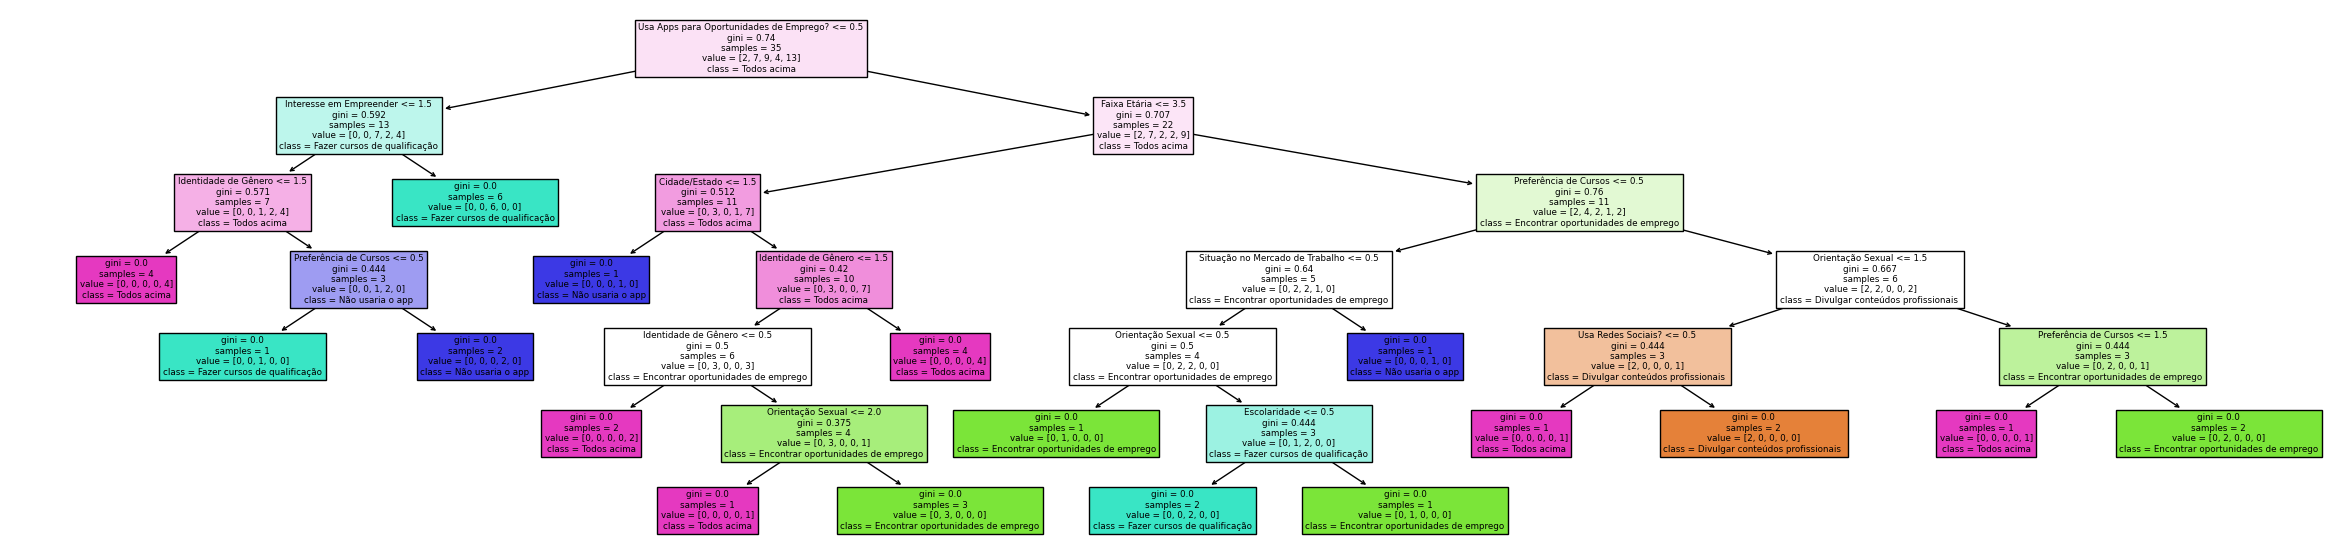

In [8]:

classificador_tree = tree.DecisionTreeClassifier(
        criterion='gini', 
    )

classificador_tree.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de teste
previsoes = classificador_tree.predict(atributos_treino)

# Avalie o desempenho do modelo
acuracia = accuracy_score(resposta_treino, previsoes)
print(f'Acurácia no conjunto de treino: {acuracia:.4f}')

report_classificacao = classification_report(resposta_treino, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_treino, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

plt.figure(figsize=(30,7))
tree.plot_tree(classificador_tree, feature_names=df_atributo.columns, class_names=classificador_tree.classes_, filled=True)
plt.show()

#### Entropia

##### Testando com dados de teste

Acurácia no conjunto de teste: 0.3333
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        0.00      0.00      0.00         1
Encontrar oportunidades de emprego       0.25      1.00      0.40         1
      Fazer cursos de qualificação       1.00      0.20      0.33         5
                  Não usaria o app       0.00      0.00      0.00         2
                       Todos acima       0.33      0.67      0.44         3

                          accuracy                           0.33        12
                         macro avg       0.32      0.37      0.24        12
                      weighted avg       0.52      0.33      0.28        12

Matriz de Confusão:
[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 2 1 0 2]
 [0 0 0 0 2]
 [0 0 0 1 2]]


C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

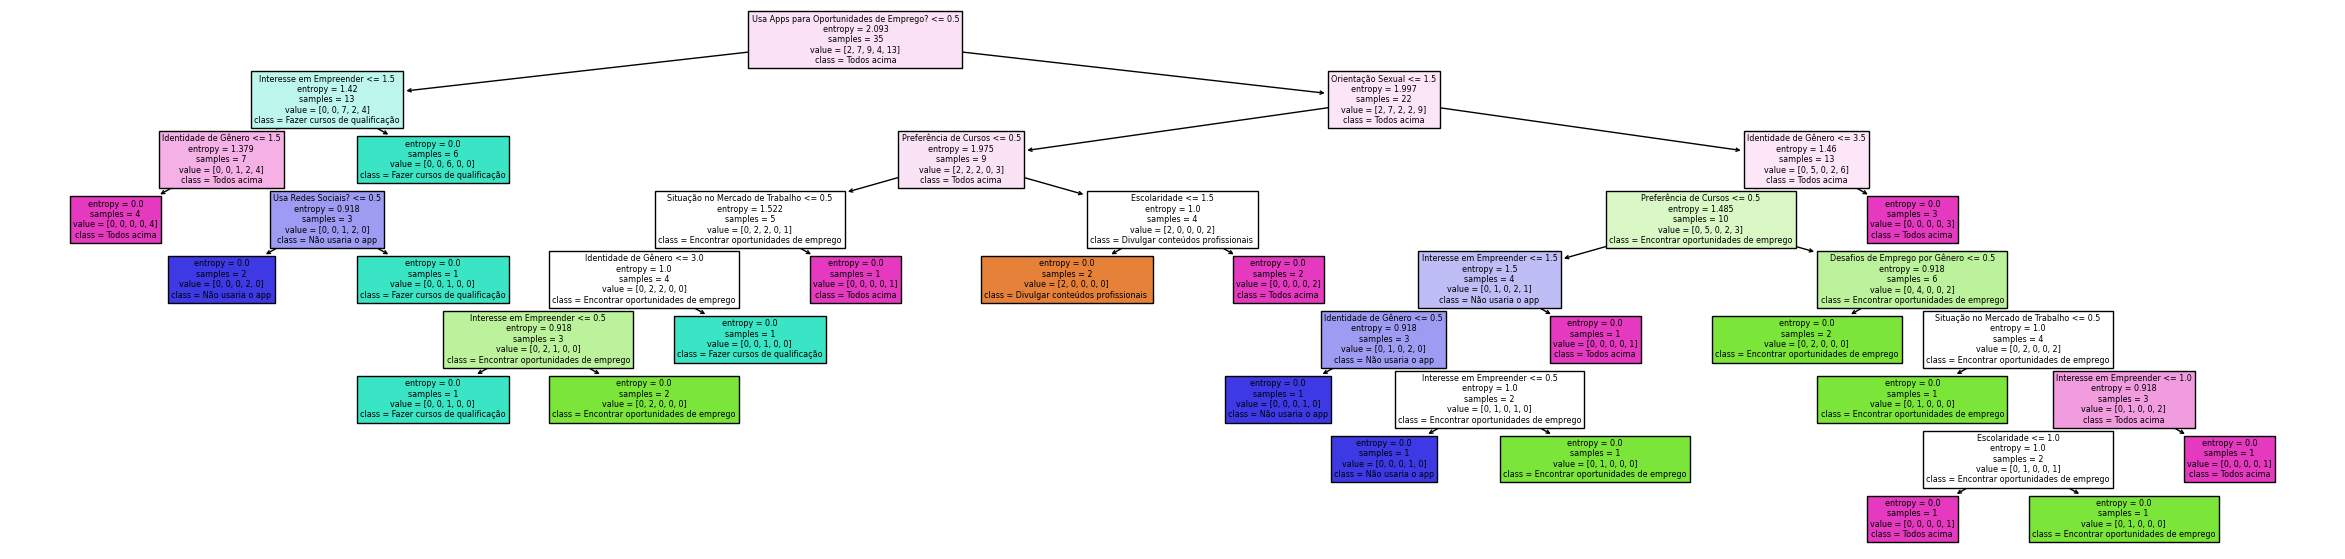

In [9]:

classificador_tree = tree.DecisionTreeClassifier(
        criterion='entropy', 
    )

classificador_tree.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de teste
previsoes = classificador_tree.predict(atributos_teste)

# Avalie o desempenho do modelo
acuracia = accuracy_score(resposta_teste, previsoes)
print(f'Acurácia no conjunto de teste: {acuracia:.4f}')

report_classificacao = classification_report(resposta_teste, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_teste, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

plt.figure(figsize=(30,7))
tree.plot_tree(classificador_tree, feature_names=df_atributo.columns, class_names=classificador_tree.classes_, filled=True)
plt.show()

##### Testando com dados de treino

Acurácia no conjunto de teste: 1.0000
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        1.00      1.00      1.00         2
Encontrar oportunidades de emprego       1.00      1.00      1.00         7
      Fazer cursos de qualificação       1.00      1.00      1.00         9
                  Não usaria o app       1.00      1.00      1.00         4
                       Todos acima       1.00      1.00      1.00        13

                          accuracy                           1.00        35
                         macro avg       1.00      1.00      1.00        35
                      weighted avg       1.00      1.00      1.00        35

Matriz de Confusão:
[[ 2  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  9  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 13]]


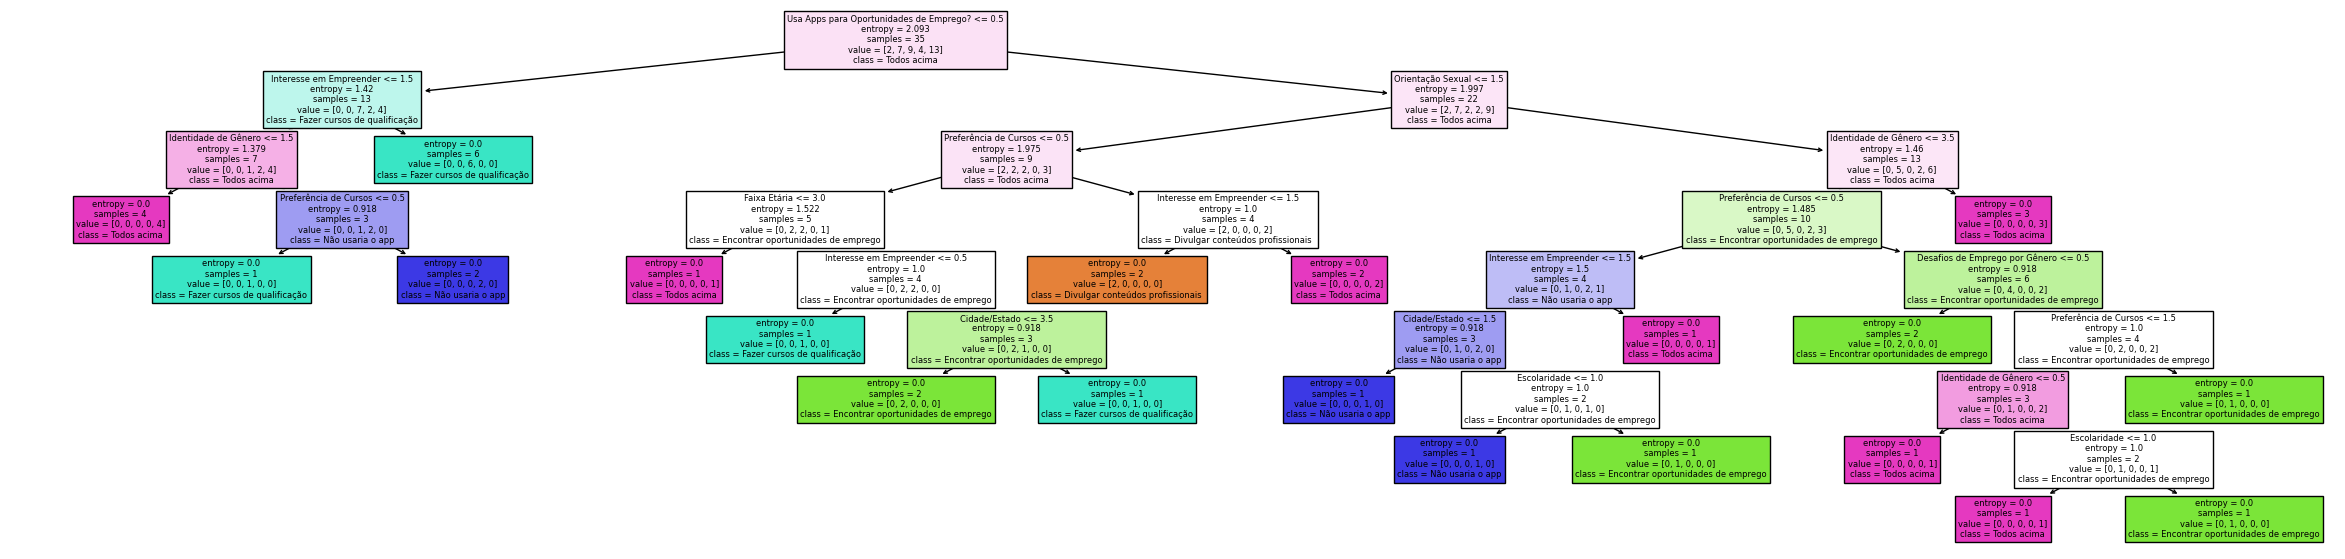

In [10]:

classificador_tree = tree.DecisionTreeClassifier(
        criterion='entropy', 
    )

classificador_tree.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de teste
previsoes = classificador_tree.predict(atributos_treino)

# Avalie o desempenho do modelo
acuracia = accuracy_score(resposta_treino, previsoes)
print(f'Acurácia no conjunto de teste: {acuracia:.4f}')

report_classificacao = classification_report(resposta_treino, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_treino, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

plt.figure(figsize=(30,7))
tree.plot_tree(classificador_tree, feature_names=df_atributo.columns, class_names=classificador_tree.classes_, filled=True)
plt.show()

### KNeighborsClassifier

##### Testando com dados de teste

In [11]:
classificador_knn = KNeighborsClassifier()

classificador_knn.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de teste
previsoes = classificador_knn.predict(atributos_teste)

# Avaliação do modelo
taxa_de_acerto = accuracy_score(resposta_teste, previsoes)
print("Taxa de acerto:", round(taxa_de_acerto * 100, 2))

report_classificacao = classification_report(resposta_teste, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_teste, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

Taxa de acerto: 25.0
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        0.00      0.00      0.00         1
Encontrar oportunidades de emprego       0.00      0.00      0.00         1
      Fazer cursos de qualificação       0.33      0.20      0.25         5
                  Não usaria o app       0.00      0.00      0.00         2
                       Todos acima       0.40      0.67      0.50         3

                          accuracy                           0.25        12
                         macro avg       0.15      0.17      0.15        12
                      weighted avg       0.24      0.25      0.23        12

Matriz de Confusão:
[[0 1 0 0 0]
 [0 0 0 0 1]
 [0 2 1 0 2]
 [0 1 1 0 0]
 [0 0 1 0 2]]


C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

##### Testando com dados de treino

In [12]:
classificador_knn = KNeighborsClassifier()

classificador_knn.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de treino
previsoes = classificador_knn.predict(atributos_treino)

# Avaliação do modelo
taxa_de_acerto = accuracy_score(resposta_treino, previsoes)
print("Taxa de acerto:", round(taxa_de_acerto * 100, 2))

report_classificacao = classification_report(resposta_treino, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_treino, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

Taxa de acerto: 45.71
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        0.67      1.00      0.80         2
Encontrar oportunidades de emprego       0.33      0.43      0.38         7
      Fazer cursos de qualificação       0.33      0.33      0.33         9
                  Não usaria o app       0.00      0.00      0.00         4
                       Todos acima       0.57      0.62      0.59        13

                          accuracy                           0.46        35
                         macro avg       0.38      0.48      0.42        35
                      weighted avg       0.40      0.46      0.43        35

Matriz de Confusão:
[[2 0 0 0 0]
 [1 3 2 0 1]
 [0 3 3 0 3]
 [0 1 1 0 2]
 [0 2 3 0 8]]


C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

### GaussianNB

##### Testando com dados de teste

In [13]:

classificador_bayes = GaussianNB()

classificador_bayes.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de teste
previsoes = classificador_bayes.predict(atributos_teste)

# Avaliação do modelo
taxa_de_acerto = accuracy_score(resposta_teste, previsoes)
print("Taxa de acerto:", round(taxa_de_acerto * 100, 2))

report_classificacao = classification_report(resposta_teste, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_teste, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

Taxa de acerto: 33.33
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        0.00      0.00      0.00         1
Encontrar oportunidades de emprego       0.00      0.00      0.00         1
      Fazer cursos de qualificação       0.67      0.80      0.73         5
                  Não usaria o app       0.00      0.00      0.00         2
                       Todos acima       0.00      0.00      0.00         3

                          accuracy                           0.33        12
                         macro avg       0.13      0.16      0.15        12
                      weighted avg       0.28      0.33      0.30        12

Matriz de Confusão:
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 1 4 0 0]
 [1 1 0 0 0]
 [0 2 1 0 0]]


C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s

##### Testando com dados de treino

In [14]:

classificador_bayes = GaussianNB()

classificador_bayes.fit(atributos_treino, resposta_treino)

# Faça previsões no conjunto de treino
previsoes = classificador_bayes.predict(atributos_treino)

# Avaliação do modelo
taxa_de_acerto = accuracy_score(resposta_treino, previsoes)
print("Taxa de acerto:", round(taxa_de_acerto * 100, 2))

report_classificacao = classification_report(resposta_treino, previsoes)
print(report_classificacao)

matriz_de_confusao = confusion_matrix(resposta_treino, previsoes)
print("Matriz de Confusão:")
print(matriz_de_confusao)

Taxa de acerto: 42.86
                                    precision    recall  f1-score   support

 Divulgar conteúdos profissionais        0.29      1.00      0.44         2
Encontrar oportunidades de emprego       0.36      0.71      0.48         7
      Fazer cursos de qualificação       0.55      0.67      0.60         9
                  Não usaria o app       0.67      0.50      0.57         4
                       Todos acima       0.00      0.00      0.00        13

                          accuracy                           0.43        35
                         macro avg       0.37      0.58      0.42        35
                      weighted avg       0.30      0.43      0.34        35

Matriz de Confusão:
[[2 0 0 0 0]
 [0 5 2 0 0]
 [3 0 6 0 0]
 [0 2 0 2 0]
 [2 7 3 1 0]]


C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\oliviadomingues-ieg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\s